# Solutions of Class Exercises - Week 5

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.2 - 06/02/2025

---
---

**Reminder:** The solutions of some these exercises may be found online. Do not look for the solutions, but ask for help to me or the GTA. Your assessment will not have a solution available online so it is of paramount importance that you learn how to solve the problems without relying on a solution being available.

The solutions of these exercises will be discussed at the end of the session. Moreover, the complete solution will be provided to you after 1 week.  **N.B.** **Do not share the solutions online**

## Exercise 1

A common approximation problem consists in fitting a series of measurements using a specific class of functions. For instance, one can look for the best linear interpolator or the best polynomial interpolator. A popular class of interpolators is the class of rational functions, i.e. functions which are the ratio of two polynomials. For instance, this is the case in control engineering, where the measurements are sampled values of the transfer function, called "moments", and we aim at obtaining the best transfer function that matches the sampled moments. Of course, transfer functions are rational functions.

Consider the following **quasiconvex** optimisation problem:
$$
\begin{array}{ll}
\min & \displaystyle \max_{i=1,\dots,k} \left| \frac{p(t_i)}{q(t_i)}-y_i\right|
\end{array} \tag{1}
$$
with
$$
p(t) = a_0 + a_1 t + a_2 t^2 + \cdots + a_m t^m, \qquad q(t) = 1 + b_1t + \cdots + b_n t^n,
$$
where the domain of the objective function is
$$
D = \{(a,b)\in \mathbb{R}^{m+1}\times \mathbb{R}^n : q(t) > 0, \,\,\alpha \le t \le \beta \}.
$$
In this problem we fit a rational function $p(t)/q(t)$ to given data $y$, while constraining the polynomial denominator to be positive in the interval $[\alpha,\beta]$. The optimisation variables are the numerator and denominator coefficients $a_i$ and $b_i$.

Here, we consider the specific problem instance with data

$$
t_i = -3 + 6\frac{i-1}{k-1}, \quad y_i = e^{t_i}, \quad i=1,\dots,k, \tag{2}
$$

where $k=201$. In other words, the data are obtained by uniformly sampling the exponential function over the interval $[-3,3]$.

For this exercise you will find useful Sub-Section "*Representation via a family of convex functions*" in 4.3.1 and
Sub-Section "*Special case: Quasiconvex Optimisation*" in 5.1.1.

*    Transform problem $(1)$ into a convex feasibility problem. (*NB: you do not have to prove that the convex representation is convex. The proof is postponed to Exercise $2$*).
*    Solve problem $(1)$ for $m=2$ and $n=2$, with a bisection tolerance of $0.001$ (as upper bound you can pick $e^3$).
*    Plot, in the same figure, the exponential in $(2)$ with a solid line and the rational approximation obtained with the optimal $a_0$, $a_1$, $a_2$, $b_1$ and $b_2$ with a dashed line.

### Solution Exercise 1

The problem can be solved by transforming it into a feasibility problem, namely

$$
\begin{array}{lll}
\min & 0 & \\
\text{s.t.} & | p(t_i) - y_i q(t_i)| \le \gamma q(t_i) & i=1,\dots,k  
\end{array} \tag{1}
$$

which is solved in the following code. (The proof of the convexity of the problem above is postponed to Exercise $2$.)

In [ ]:
# Include some libraries
import cvxpy as cp
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# Generate the points for the interpolation
k = 201
t = np.zeros(k)
y = np.zeros(k)

for i in range(k):
  t[i] = -3 + 6*(i)/(k-1)
  y[i] = math.exp(t[i])

In [ ]:
# Declare the variables
a = cp.Variable(3)
b = cp.Variable(2)

# Construct the array [1  b_0  b_1]
bt=np.array([1,0,0])+np.array([0,1,0])*b[0]+np.array([0,0,1])*b[1]

# Construct the matrix where the row i is [1 t_i t_i^2]
Tmatrix = np.array([np.ones(k), t, t*t])

In [ ]:
# Tolerance, upper and lower bound for the bisection
u = math.exp(3)
l = 0
tol = 0.001

# Bisection algorithm
while u-l >= tol:
  gamma = (l+u)/2
  # Formulation and soluton of the feasibility problem
  pt = a@Tmatrix
  qt = bt@Tmatrix
  constr = [cp.abs(pt - cp.multiply(y,qt)) <= gamma*qt]
  prob = cp.Problem(cp.Minimize(0),constr)
  prob.solve()

  if prob.status == 'optimal':
    u=gamma
    a_opt=a.value
    b_opt=b.value
    objval_opt=gamma
  else:
    l=gamma

In [ ]:
print("The optimal a_i are",a_opt)
print("The optimal b_i are",b_opt)
print("The optimal objective value is",objval_opt)

The optimal a_i are [1.00971251 0.61197358 0.11353697]
The optimal b_i are [-0.41454048  0.04848698]
The optimal objective value is 0.02329255380496617


In [ ]:
# Computation of the optimal interpolant
bt_opt=np.array([1,0,0])+np.array([0,1,0])*b_opt[0]+np.array([0,0,1])*b_opt[1]
y_fit=a_opt@Tmatrix/(bt_opt@Tmatrix)

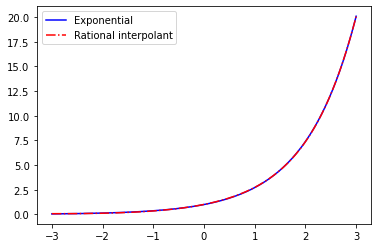

In [ ]:
# Plot of the interpolant and of the real function
plt.plot(t, y,'-b',label="Exponential")
plt.plot(t, y_fit,'-.r',label="Rational interpolant")
plt.legend()
plt.show()

## Exercise 2

Prove that the problem in Exercise 1 is a quasiconvex optimisation problem. To this end:

*   Show that the domain $D$ is convex.
*   Find a convex representation $\phi_\gamma$ of the sublevel sets of the objective function. Show that $\phi_\gamma$ is convex.



### Hint

The important fact to notice is that the polynomials $p(t)$ and $q(t)$ are **linear** functions in the parameters $a_i$ and $b_i$.

### Solution Exercise 2

First of all, note that $p(t)$ and $q(t)$ are linear functions in the parameters $a_i$ and $b_i$. Thus, $p(t)$, $-p(t)$, $q(t)$ and $-q(t)$ are both convex and concave.

*    The domain $D$ is convex because it is a hyperspace defined by a set of linear inequalities.

*    Now note that since $q(t_i)>0$ for all $i=1,\dots,k$, we have
$$
\phi_\gamma = \max_{i=1,\dots,k} \left| \frac{p(t_i)}{q(t_i)}-y_i\right| -\gamma  \le 0
$$
if and only if
$$
| p(t_i) - y_i q(t_i)| \le \gamma q(t_i), \qquad i=1,\dots,k.
$$
or, equivalently
$$
 p(t_i) - y_i q(t_i) \le \gamma q(t_i), \qquad i=1,\dots,k.
$$
$$
 - p(t_i) + y_i q(t_i) \le \gamma q(t_i), \qquad i=1,\dots,k.
$$
which are all linear inequalities and so define a hyperspace. Thus, all sublevel sets are convex, which implies that the problem is quasiconvex.

## Exercise 3

In general the product or ratio of two convex functions is not convex. However, there are some results that apply to functions on $\mathbb{R}$.

Prove the following:
1.   If $f$ and $g$ are convex, both nondecreasing (or nonincreasing), and positive functions on an interval, then $fg$ is convex. (*Hint: use Jensen's inequality*)
2.   If $f$, $g$ are concave, positive, with one nondecreasing and the other nonincreasing,
then $fg$ is concave.
3.   If $f$ is convex, nondecreasing, and positive, and $g$ is concave, nonincreasing, and
positive, then $f/g$ is convex.

### Solution Exercise 3

1.   We prove the result by verifying Jensen's inequality. $f$ and $g$ are positive and convex, hence for $0\le \theta \le 1$
$$
\begin{array}{rcl}
f(\theta x + (1-\theta)y)g(\theta x + (1-\theta)y) &\le& (\theta f(x) + (1-\theta) f(y))(\theta g(x) + (1-\theta) g(y))\\
&=& \theta f(x)g(x) + (1-\theta)f(y)g(y)\\
&&+ \theta(1-\theta)(f(y)-f(x))(g(x)-g(y)).
\end{array}
$$
The third term is less than or equal to zero if $f$ and $g$ are both increasing or both
decreasing. Therefore
$$
f(\theta x + (1-\theta)y)g(\theta x + (1-\theta)y) \le \theta f(x)g(x) + (1-\theta)f(y)g(y)
$$
2.   Reverse the inequalities in the solution of part 1.
3.   It suffices to note that $1/g$ is convex, positive and increasing, so the result follows
from part 1.